# Decision Tree and Random Forest

## Decision Tree

Decision trees are essentially if/then rules. At each step there is a split on a variable that results in either another split or a prediction. This makes them extremely interpretable because you can determine how predictions were made by following an observation through the tree and you can determine important variables by looking at what the splits were toward the top of the tree.

Decision trees are notorious for overfitting, so it is often wise to prune them. This means imposing constraints on the size of the decision trees to keep them from just memorizing the training data. 

### Decision Tree Example

In this example we’ll train a decision tree for the famous Titanic dataset. Each row is a person, and we’re going to try to predict if someone is likely to survive given their demographics and other information about their socioeconomic status.

In [1]:
# Overall setup with library imports and notebook settings
import time  # For timing model training
import numpy as np  # Multidimensional arrays
import pandas as pd  # Data frames & manipulation (built on NumPy)
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Plotting (built on matplotlib)
import sklearn  # Machine learning
from sklearn.model_selection import train_test_split  # Splitting data between the training and testing set

# Rendering plots within the Jupyter notebook
%matplotlib inline

First, we will import the data, remove redundant variables that are captured in other variables, handle missing values by either dropping columns or filling the missing values with either the mean or mode, and preview the first few rows.

In [2]:
# Loading the dataset
df = sns.load_dataset('titanic')
print(df.shape)

# Removing redundant columns
df.drop(['embarked', 'alive', 'pclass', 'adult_male'], axis=1, inplace=True)

# Handling missing values
df.drop('deck', axis=1, inplace=True)  # Dropping since most observations are missing
df.fillna(df.mean(), axis=0, inplace=True)  # All numerical columns
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)  # Categorical column with text

# Previewing the data frame
df.head()

(891, 15)


C:\Users\pz6755\AppData\Local\Temp\ipykernel_22880\1307039748.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), axis=0, inplace=True)  # All numerical columns


,survived,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,Southampton,True


We need to one-hot encode our categorical variables (this is just making each of our categories having its own column and either a 0 or a 1 for if the observation had that category) and encode our ordinal variables to have a numerical representation.

In [3]:
# Handling categorical variables by one-hot encoding them
# This means making each category its own column with a binary flag
df = pd.get_dummies(df, columns=['sex', 'who', 'embark_town'], drop_first=False)

# Converting the class, an ordinal variable, into numbers
class_mapper = {'Third': 3, 'Second': 2, 'First': 1}
df['class'].replace(class_mapper, inplace=True)

# Converting the last categorical column into a binary integer for consistency
df['alone'] = df['alone'].astype(int)

df.head()

,survived,age,sibsp,parch,fare,class,alone,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,22.0,1,0,7.2500,3,0,0,1,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,0,1,1,0,0
2,1,26.0,0,0,7.9250,3,1,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,1
4,0,35.0,0,0,8.0500,3,1,0,1,0,1,0,0,0,1


Next we’ll split our data into training and testing sets and fit our un-pruned model.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Assigning the features and labels to variables before splitting them
features = df.drop('survived', axis=1)
label = df['survived']

# Splitting the observations into a training and a testing set for the holdout method
# Note: k-folds cross validation should be used for a dataset this small in order
#       to obtain a more realistic accuracy. This won't be used for simplicity
#       in this example.
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)

# Instantiating the model
decision_tree_model = DecisionTreeClassifier()

# Fitting the model and timing how long it takes
start_time = time.time()
decision_tree_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the accuracy of our model
# Using model.score() since this will product the accuracy by default
accuracy = decision_tree_model.score(X_test, y_test)

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the accuracy
print('Accuracy:', accuracy)

Total time to fit the model: 0.0029921531677246094
Accuracy: 0.7985074626865671


That was an extremely quick training time, and we were able to obtain an accuracy of almost 80% on the testing set!

As mentioned earlier, decision trees are highly interpretable since they are a series of if/then rules, so let’s plot this decision tree to see what the most important factors are for determining if someone is likely to survive the Titanic tragedy:

In [6]:
# conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pz6755\AppData\Local\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.73.0           |      h2bbff1b_12          16 KB
    cairo-1.16.0               |       haedb8bc_4         1.9 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fontconfig-2.14.1          |       hc0defaf_1         198 KB
    fonts-conda-ecosystem-1    |       hd3eb1b0_0           5 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       h7eca76f_1        1007 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |      



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [8]:
pip install pydotplus

  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24578 sha256=9c98e188ee3f8a5befdc7aa6f0af7db93431344b310dbe79428930f0b3f16933
  Stored in directory: c:\users\pz6755\appdata\local\pip\cache\wheels\5c\94\1f\953aa60af58ef512e5256e538ff0772c340229e5996ac51fd6
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


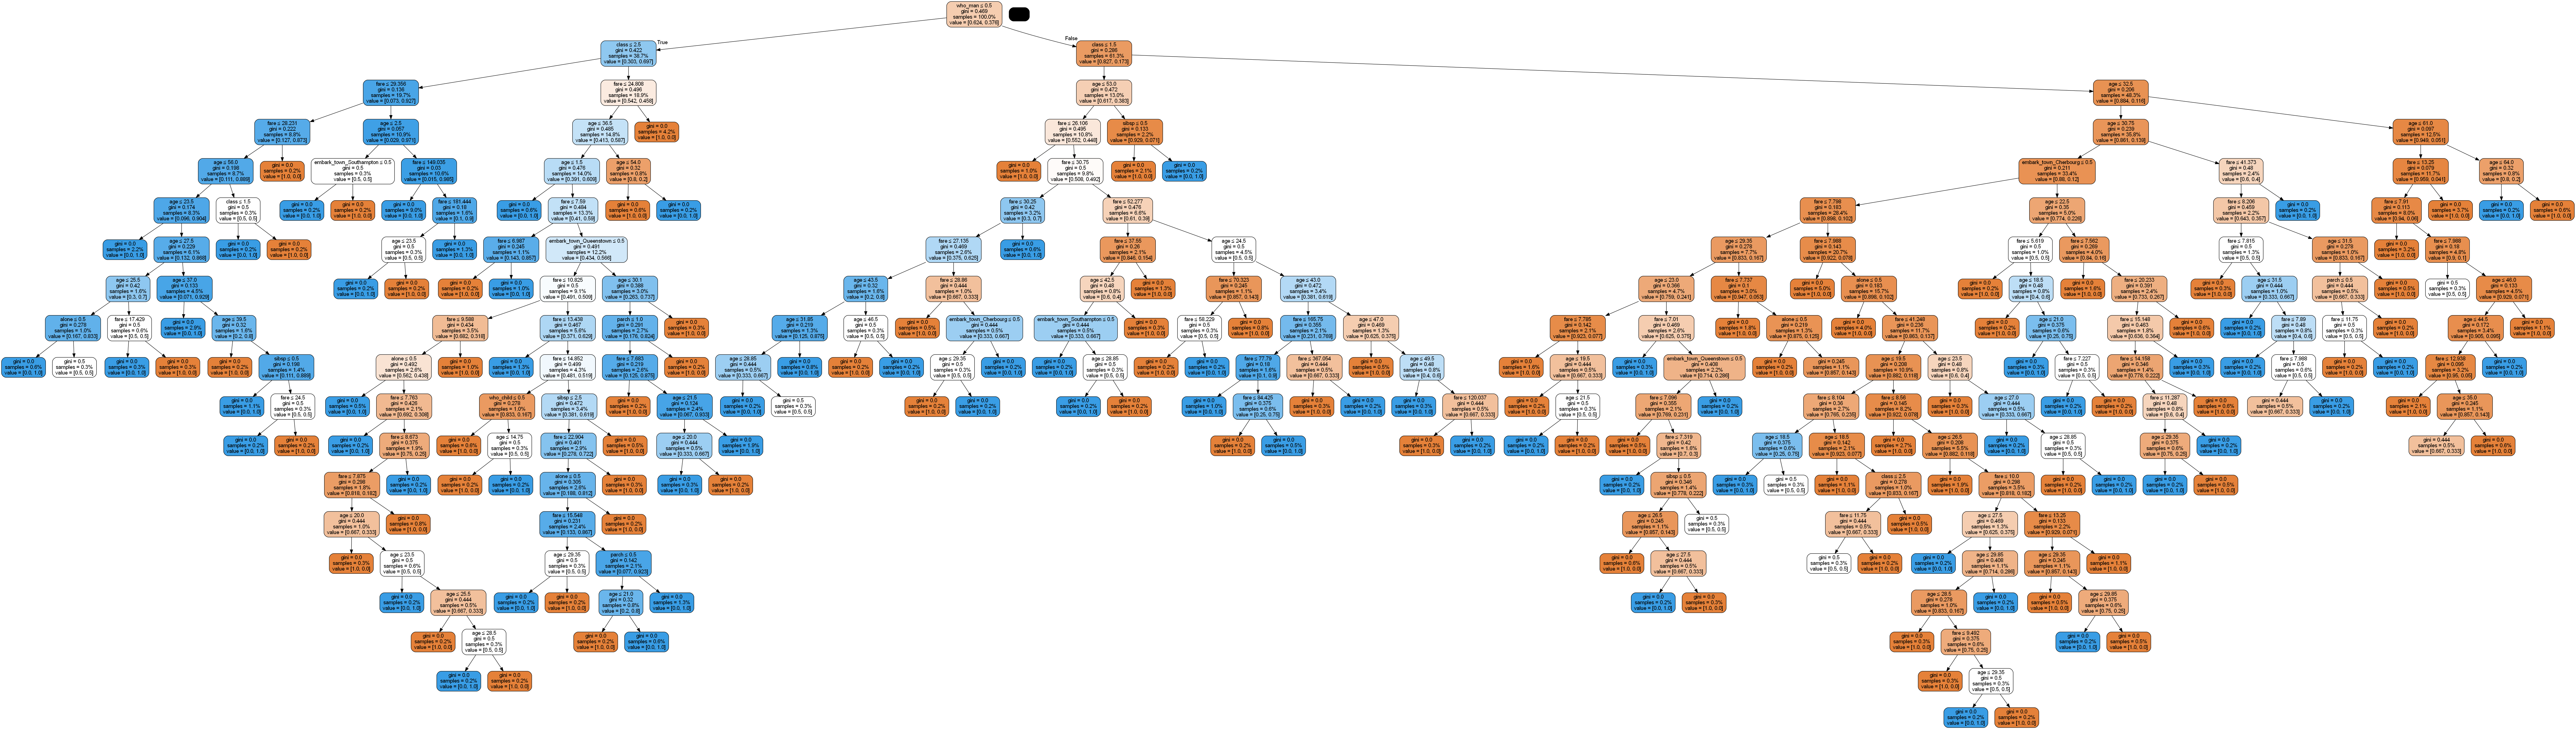

In [9]:
# Visualizing the decision tree
def plot_decision_tree(model, feature_names=None):
    '''
    Plots the decision tree from a scikit-learn DecisionTreeClassifier or DecisionTreeRegressor
    Requires graphviz: https://www.graphviz.org
    
    Notes on decision tree visualization:
        - The Gini score is the level of "impurity" of the node. 
            - Scores closer to 0.5 are more mixed, whereas scores closer to 0 are more homogenous
        - For classification, the colors correspond to different classes
            - The shades are determined by the Gini score. Nodes closer to 0.5 will be lighter.
        - Values contain the number of samples in each category
    '''
    from six import StringIO  
    from IPython.display import Image  
    from sklearn.tree import export_graphviz
    import pydotplus

    dot_data = StringIO()
    
    export_graphviz(model, out_file=dot_data,  
                    filled=True, rounded=True,
                    proportion=True,
                    special_characters=True,
                    feature_names=feature_names)

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))
    
    
plot_decision_tree(decision_tree_model, feature_names=X_train.columns)

In order to make this more interpretable (and potentially improve the testing accuracy) we will try pruning the tree to different levels. More specifically, we’ll restrict the size of our tree by imposing limits on the max depth, which is the number of levels that can exist within the tree. Our above tree has roughly 18 levels for reference.

In [9]:
# Specifying our levels of pruning to try
max_depths_to_try = [2, 3, 4, 5, 6, 7, 8, None]

# Instantiating a list to fill with the test accuracy of our models
test_accuracies = []

# Training the models and storing the test accuracies
for depth in max_depths_to_try:
    decision_tree_model = DecisionTreeClassifier(max_depth=depth)
    decision_tree_model.fit(X_train, y_train)
    accuracy = decision_tree_model.score(X_test, y_test)
    test_accuracies.append(accuracy)
    
# Putting the results into a data frame for viewing the results better
results = pd.DataFrame({'Max Tree Depth': max_depths_to_try, 'Test Accuracy': test_accuracies})

# Sorting the results by the test accuracy
results.sort_values('Test Accuracy', ascending=False)

,Max Tree Depth,Test Accuracy
1,3.0,0.847015
3,5.0,0.839552
2,4.0,0.832090
0,2.0,0.817164
4,6.0,0.817164
5,7.0,0.798507
7,NaN,0.798507
6,8.0,0.794776


This shows that pruning has a positive impact on the generalizability for our problem. Next, let’s plot the top performing tree:

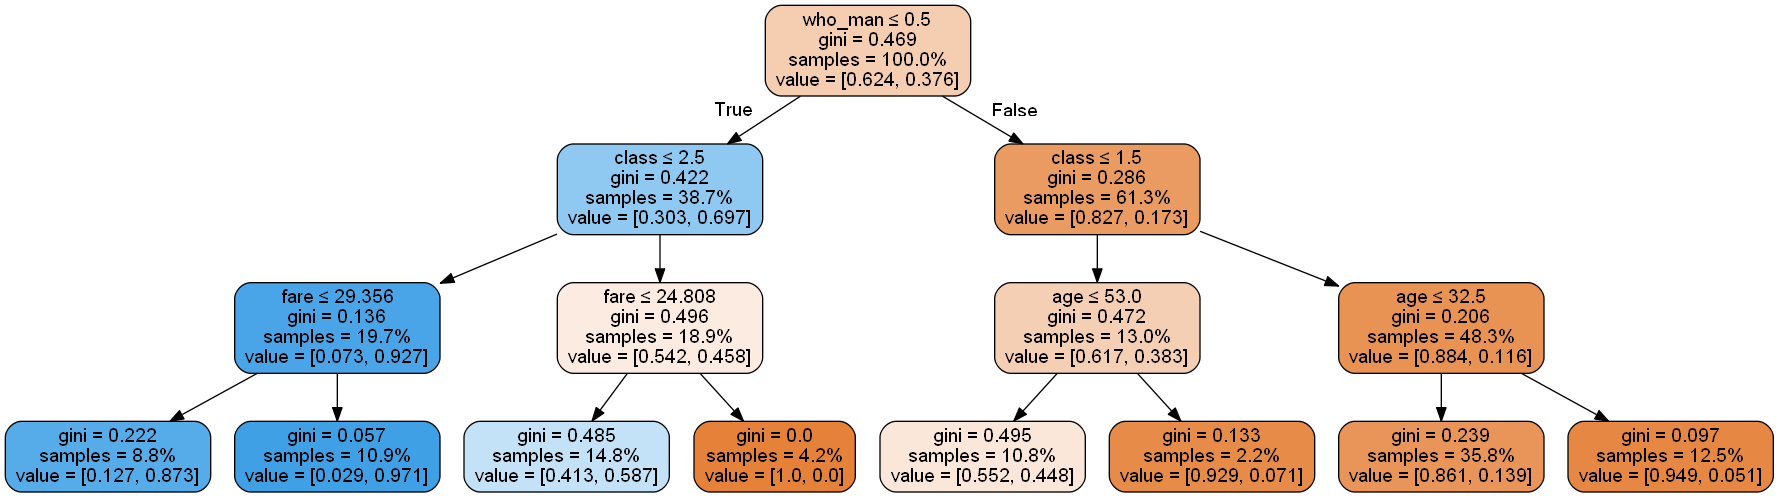

In [10]:
# Re-fitting the top performing model before plotting the tree
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Plotting the tree
plot_decision_tree(decision_tree_model, feature_names=X_train.columns)

This tree is significantly easier to understand. This shows us that adult males are the most important variable to split on - this makes a lot of sense given the “women and children” adage. Of the adult men (who only have a 17.3% chance of surviving), the first class passengers have a higher chance of surviving at 38.3%, but the non-first class passengers only have an 11.6% chance of surviving. We can see a similar split on socioeconomic status for our non adult men passengers where passengers in either the first or second class have a 92.7% chance of surviving while third class passengers only have a 45.8% chance of surviving.

One thing to point out on this tree is that you can see that at least one of the child nodes of each split has a lower gini score than the parent node. This illustrates how decision trees continue growing by finding splits that minimize the gini score. You can also see how the above tree begins overfitting with extremely specific rules that result in only a few samples.

## Ensemble Models: Random Forests

Random forests are a popular type of ensemble model that train and combines several decision trees. They have a high predictive power, train relatively quickly, and still have a decent amount of interpretability. They are considered a “black box model” in the sense that we can’t easily determine why they make the predictions that they do, but we can understand how much different features are used in the models - but this does not tell us how positive or negative that variable is for making predictions. Due to the way they are constructed, they are more “idiot proof” in the sense that there are fewer assumptions and they are fairly robust to overfitting.

Random forests are known as bagging algorithms, which is a portmanteau of bootstrap aggregating. Bootstrapping is sampling with replacement, and the aggregations are done by having the decision trees either average or vote on the output. Each tree is different from both bootstrapping and restrictions on only having random subsets of features available to them at each split. This causes these trees to be robust to a variety of different circumstances and scenarios by not painting with a broad brush on the dataset as a whole.

### Random Forest ExamplePermalink
For this example we’re going to just take the same Titanic dataset and re-train it with a random forest model.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Instantiating the model
random_forest_model = RandomForestClassifier(n_estimators=100)

# Fitting the model and timing how long it takes
start_time = time.time()
random_forest_model.fit(X_train, y_train)
end_time = time.time()

# Calculating the accuracy of our model
# Using model.score() since this will product the accuracy by default
accuracy = random_forest_model.score(X_test, y_test)

# Reporting how long it takes to fit the model
print('Total time to fit the model:', end_time - start_time)

# Reporting the accuracy
print('Accuracy:', accuracy)

Total time to fit the model: 0.10871052742004395
Accuracy: 0.832089552238806


Without any hyperparameter tuning we were able to obtain an accuracy higher than most of our individual decision trees. The obvious downside is that it took significantly longer to train - 47x longer in this case.

As mentioned earlier that random forests are notoriously robust to overfitting. We saw how decision trees suffer drastically from a lack of pruning - let’s do the opposite and grow increasingly larger random forests and examine the performance:

In [12]:
# Testing robustness to overfitting by using an increasing number of trees
for num_trees in [10, 100, 1000, 10000]:
    print('Fitting with {0} trees'.format(num_trees))
    
    # Instantiating the model
    random_forest_model = RandomForestClassifier(n_estimators=num_trees,
                                                 n_jobs=-1)  # Parallelizing to all avaiable CPU cores

    # Fitting the model and timing how long it takes
    start_time = time.time()
    random_forest_model.fit(X_train, y_train)
    end_time = time.time()

    # Calculating the accuracy of our model
    # Using model.score() since this will product the accuracy by default
    accuracy = random_forest_model.score(X_test, y_test)

    # Reporting how long it takes to fit the model
    print('Total time to fit the model:', end_time - start_time)

    # Reporting the accuracy
    print('Accuracy:', accuracy)
    print()

Fitting with 10 trees
Total time to fit the model: 0.03395414352416992
Accuracy: 0.8432835820895522

Fitting with 100 trees
Total time to fit the model: 0.10838675498962402
Accuracy: 0.8246268656716418

Fitting with 1000 trees
Total time to fit the model: 1.0281708240509033
Accuracy: 0.835820895522388

Fitting with 10000 trees
Total time to fit the model: 10.555005550384521
Accuracy: 0.835820895522388



While we can see the training time drastically increase, we don’t see our accuracy fluctuate too much. Clearly the smaller models would work better because of a higher accuracy and a lower inference time when deploying to production, but there wouldn’t be a large issue if accidentally using too many trees.

Lastly, we’ll examine the feature importance in order to see how interpretable random forests are.

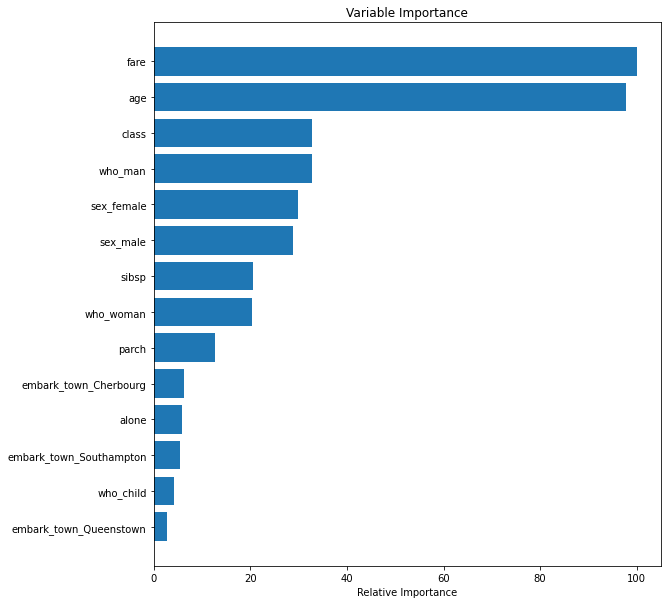

In [13]:
def plot_ensemble_feature_importance(model, features):
    '''
    Plots the feature importance for an ensemble model
    '''
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, features.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    

plot_ensemble_feature_importance(random_forest_model, features)

According to this model, fare and age are far more important than the other features for determining if someone survived or not. As mentioned, we don’t know if these have a positive or negative impact on survivorship. We can infer in this case, but it isn’t always as clear as this.